In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
df = pd.read_csv("C:\ETH-USD.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-26,763.369995,786.789978,760.934998,773.835999,773.835999,2201159936
1,2017-12-27,774.969971,789.252991,738.413025,762.841980,762.841980,2100029952
2,2017-12-28,762.208008,763.318970,701.187012,737.023010,737.023010,2389149952
3,2017-12-29,740.388977,770.117004,729.607971,753.591980,753.591980,2648969984
4,2017-12-30,753.815002,753.815002,685.231018,717.257019,717.257019,3187780096
...,...,...,...,...,...,...,...
1822,2022-12-22,1213.672607,1221.986816,1187.127808,1218.182129,1218.182129,5297471739
1823,2022-12-23,1218.079346,1226.998779,1215.994873,1220.159424,1220.159424,4835831923
1824,2022-12-24,1220.117920,1224.911621,1216.338745,1221.148560,1221.148560,2626153345
1825,2022-12-25,1221.171509,1223.517822,1203.719604,1218.962036,1218.962036,3942720070


In [91]:
df.Date= pd.to_datetime(df.Date)
df2 =df.set_index('Date')

In [92]:
df2

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-26,763.369995,786.789978,760.934998,773.835999,773.835999,2201159936
2017-12-27,774.969971,789.252991,738.413025,762.841980,762.841980,2100029952
2017-12-28,762.208008,763.318970,701.187012,737.023010,737.023010,2389149952
2017-12-29,740.388977,770.117004,729.607971,753.591980,753.591980,2648969984
2017-12-30,753.815002,753.815002,685.231018,717.257019,717.257019,3187780096
...,...,...,...,...,...,...
2022-12-22,1213.672607,1221.986816,1187.127808,1218.182129,1218.182129,5297471739
2022-12-23,1218.079346,1226.998779,1215.994873,1220.159424,1220.159424,4835831923
2022-12-24,1220.117920,1224.911621,1216.338745,1221.148560,1221.148560,2626153345


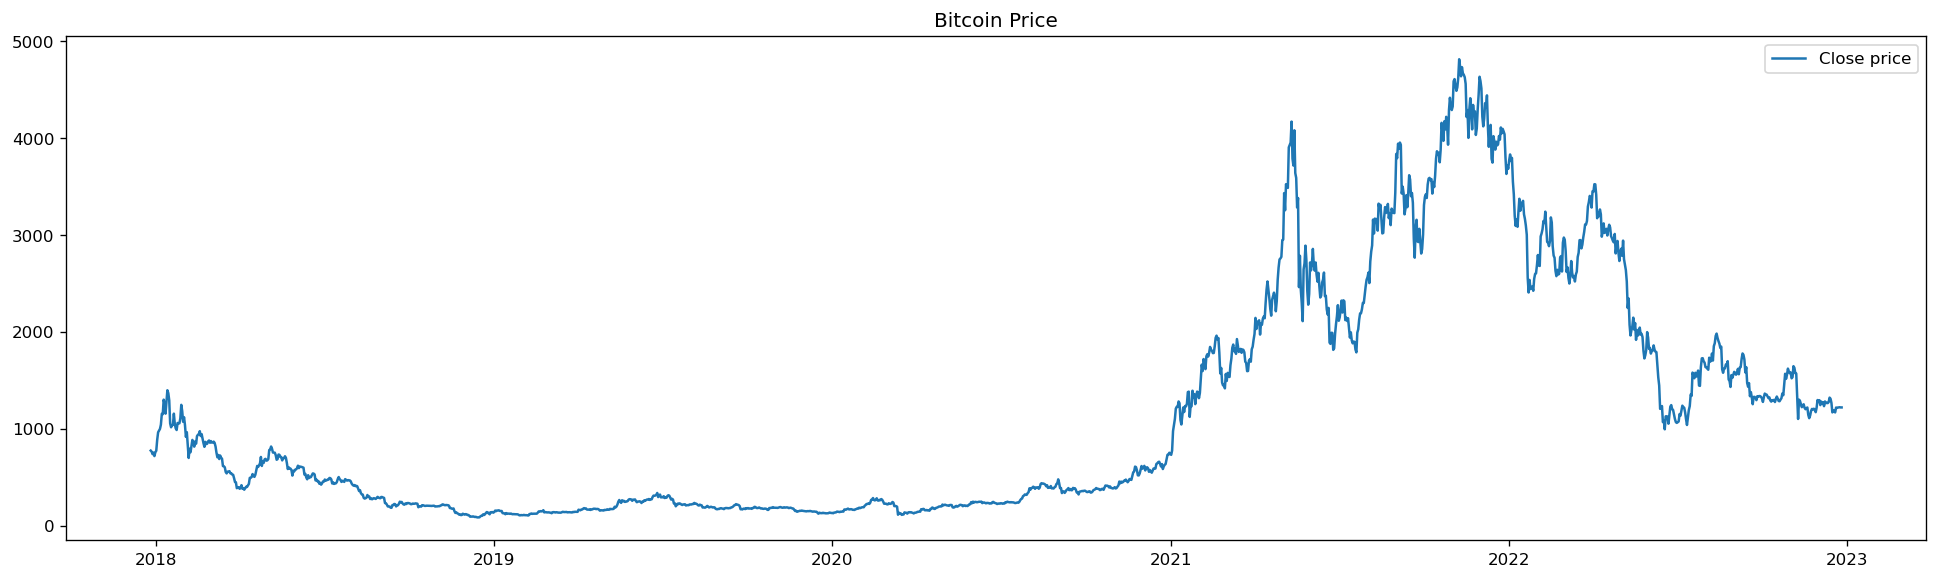

In [93]:
plt.figure(figsize=(20,12))
plt.subplot(2, 1, 1)
plt.title('Bitcoin Price')
plt.plot(df2.Close,label='Close price')
plt.legend()

In [94]:
n = int(len(df2)*0.8)
df_train = pd.DataFrame(df2['Close'][:n]).rename(columns={'Close':'y_train'})
df_test = pd.DataFrame(df2['Close'][n:]).rename(columns={'Close':'y_test'})

In [95]:
len(df_test)

366

# Check Stationarity

Method 1: Check stationary through mean and variance of time series


To check Stationary 


Before difference mean and Variance

mean1 = 308.404513 ,mean2 = 1984.114367
var1 = 59722.919448 ,var2 = 1417765.453167


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'histogram of time series data'}, xlabel='Close', ylabel='Density'>

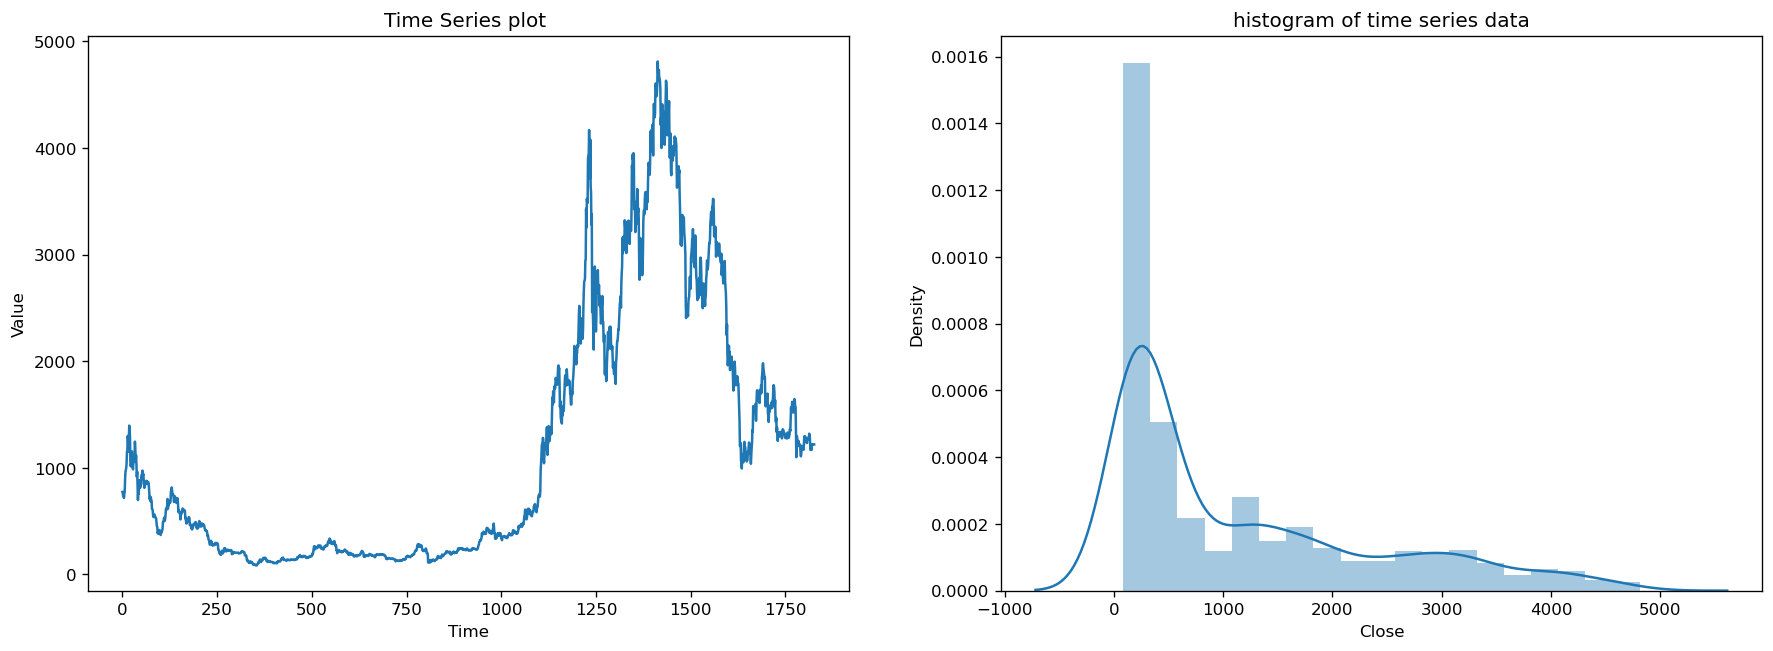

In [96]:
#taking half length of data
split = round(len(df['Close'])/2)
# split two part of time series data 
X1,X2 = df['Close'][0:split],df['Close'][split:]
mean1 ,mean2 = X1.mean() , X2.mean()
var1,var2 = X1.var() , X2.var()
print("\033[1m" + "\nTo check Stationary \n" +  "\033[0m")
print("\nBefore difference mean and Variance\n")
print("mean1 = %f ,mean2 = %f" %(mean1,mean2))
print("var1 = %f ,var2 = %f" %(var1,var2))
fig ,ax = plt.subplots(1,2,figsize = (18,6))
plt.title("histogram of time series data")
ax[0].plot(df['Close'])
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Value")
ax[0].set_title("Time Series plot ")
sns.distplot(df['Close'],ax =ax[1])

Method 2: ACF plot and PACF plot

ACF( autocorrection function) is the correlation of the time series with its lags, e.g, yt and yt-k for k = 1,2,...

PACF (partial autocorrelation function) is the partial correclation of the time series with its lags, after removing the effects of lower-order-lags between them.

D:\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


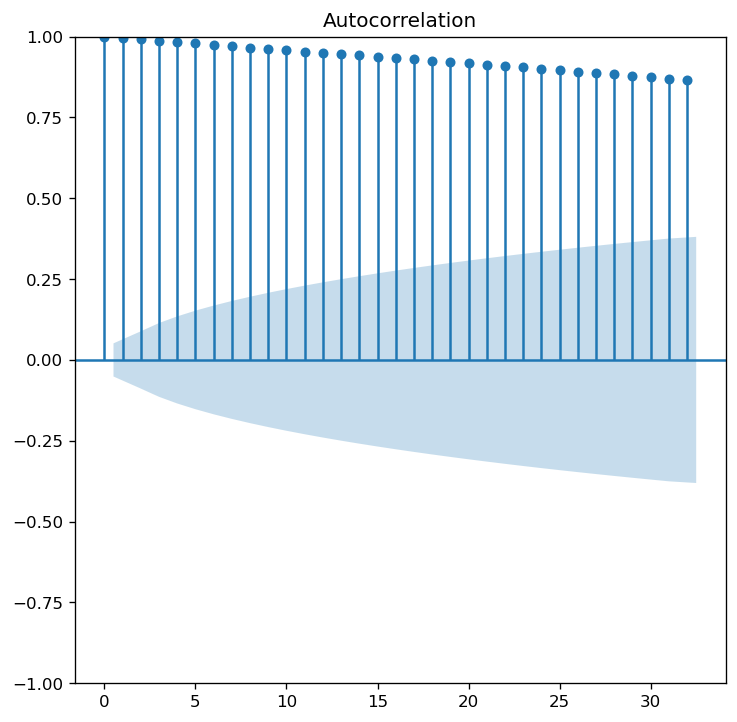

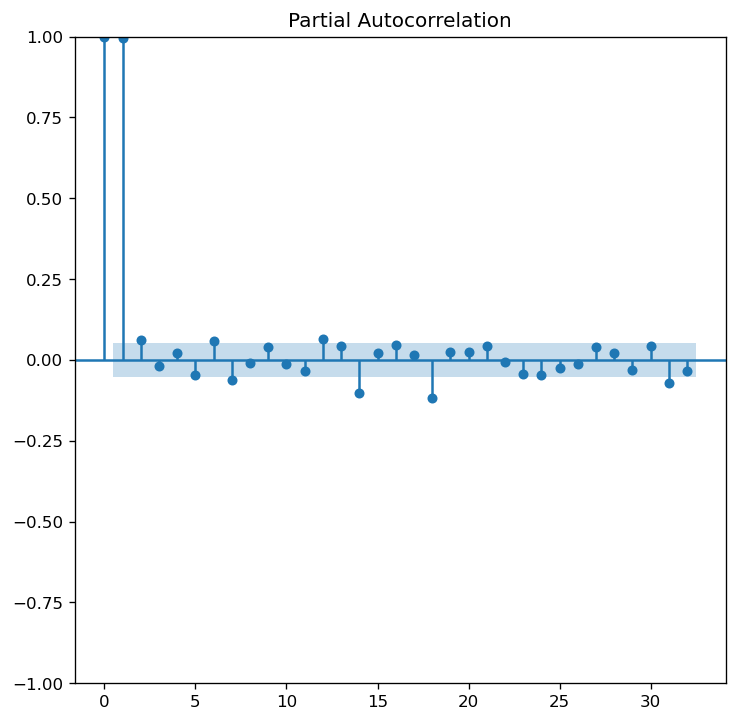

In [97]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_original = plot_acf(df_train)
pacf_orginal = plot_pacf(df_train)

Method 3: Check Stationary thourgh ADF test

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.

Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.

p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationar

In [98]:
data = list(df2["Close"])

In [99]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_train)
print("1. ADF : ",result[0])
print("2. P-Value : ", result[1])
print("3. Num Of Lags : ", result[2])
print("4. Num Of Observations Used For ADF Regression:", result[3])
print("5. Critical Values :")
for key, val in result[4].items():
  print("\t",key, ": ", val)

1. ADF :  0.6772858997290155
2. P-Value :  0.9893734976196613
3. Num Of Lags :  22
4. Num Of Observations Used For ADF Regression: 1438
5. Critical Values :
	 1% :  -3.4349056408696814
	 5% :  -2.863552005375758
	 10% :  -2.5678411776130114


In [100]:
!pip install pmdarima

# Make non-stationary to stationary

We have 4 method to make non-stationary to stationary

(i) taking its difference, where from each value in the time series data we subtract the previous value. In python we can do this by using df.diff() method. In some dataset taking the difference once is enough is to make it stationary. But some in cases, we need to take difference more than once.

(ii) take the log of the time series, using np.log(df)

(iii) take the square root of the time series, np.sqrt(df)

(iv) take the proportional change, by using df.shift(1)/df

In [101]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


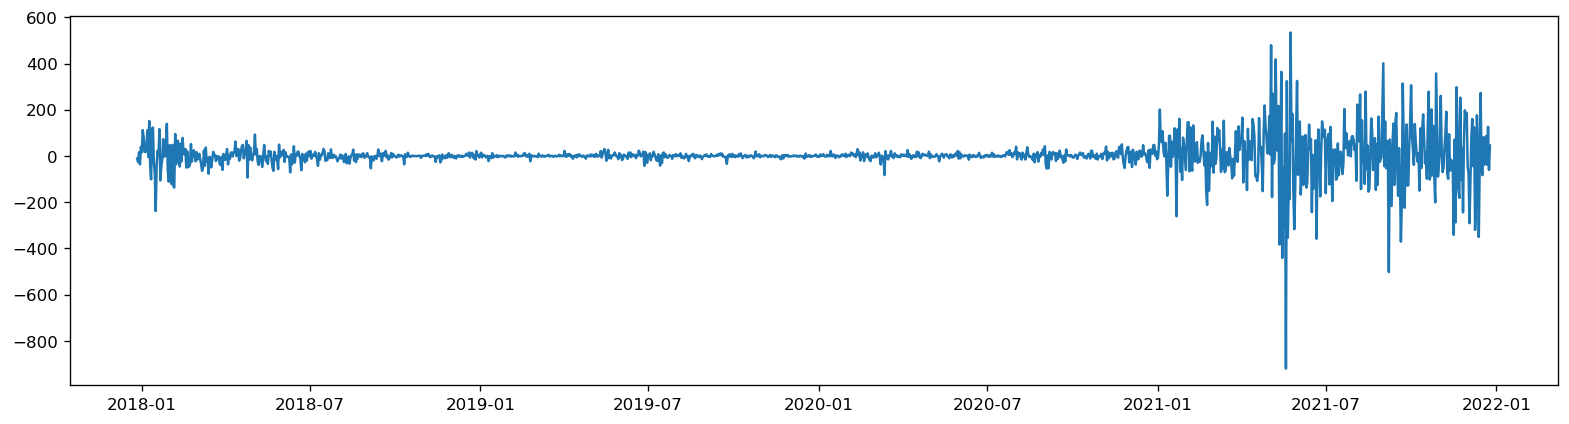

In [102]:
diff = df_train.diff().dropna()
fig = plt.subplots(figsize=(16,4))
plt.plot(diff)

D:\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


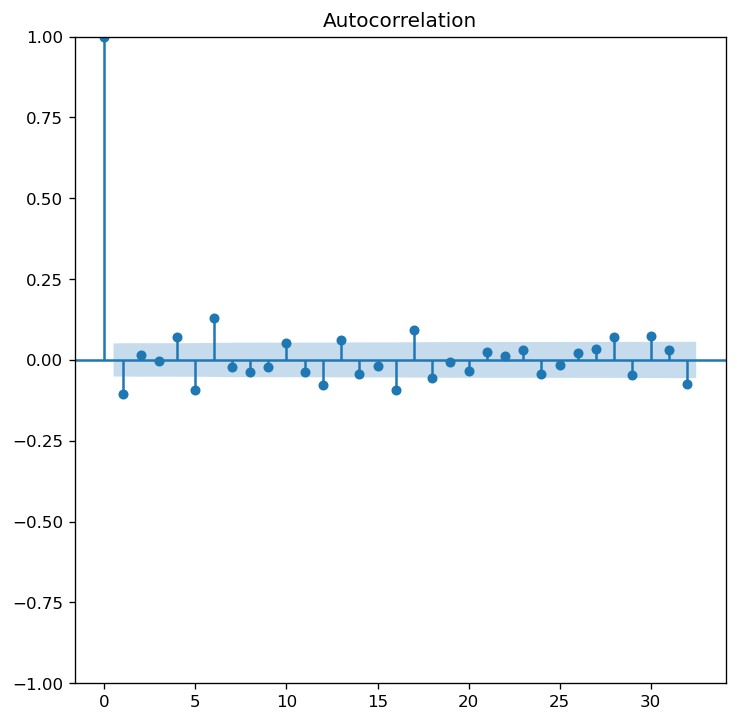

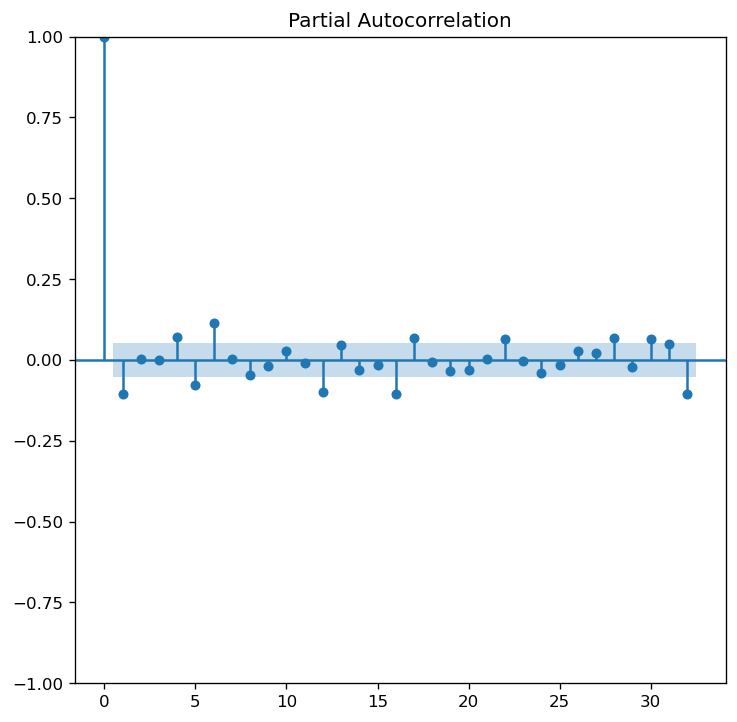

In [103]:
acf_diff = plot_acf(diff)
pacf_diff= plot_pacf(diff) 

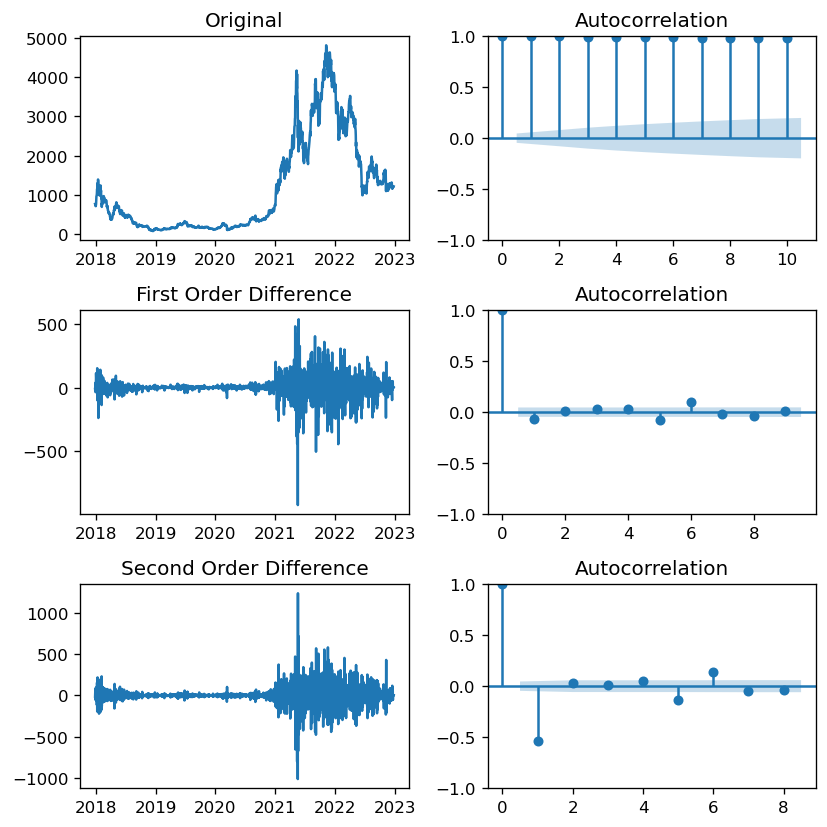

In [104]:
#Non-seasonal part
def auto_correlation(df2, prefix, lags):
    plt.rcParams.update({'figure.figsize':(7,7), 'figure.dpi':120})
    
    # Define the plot grid
    fig, axes = plt.subplots(3,2, sharex=False)

    # First Difference
    axes[0, 0].plot(df2)
    axes[0, 0].set_title('Original' + prefix)
    plot_acf(df2, lags=lags, ax=axes[0, 1])

    # First Difference
    df_first_diff = df2.diff().dropna()
    axes[1, 0].plot(df_first_diff)
    axes[1, 0].set_title('First Order Difference' + prefix)
    plot_acf(df_first_diff, lags=lags - 1, ax=axes[1, 1])

    # Second Difference
    df_second_diff = df2.diff().diff().dropna()
    axes[2, 0].plot(df_second_diff)
    axes[2, 0].set_title('Second Order Difference' + prefix)
    plot_acf(df_second_diff, lags=lags - 2, ax=axes[2, 1])
    plt.tight_layout()
    plt.show()
    
auto_correlation(df2['Close'], '', 10)

In [105]:
from statsmodels.tsa.stattools import adfuller 

result = adfuller(diff) 
print("1. ADF : ",result[0])
print("2. P-Value : ", result[1])
print("3. Critical Values :")
for key, val in result[4].items():
  print("\t",key, ": ", val)

1. ADF :  -8.469194088190296
2. P-Value :  1.4936010211495604e-13
3. Critical Values :
	 1% :  -3.4349056408696814
	 5% :  -2.863552005375758
	 10% :  -2.5678411776130114


Find d value by using ndiffs 

In [106]:
from pmdarima.arima.utils import ndiffs
d_value = ndiffs(data,test = "adf")
print("d value:", d_value)

d value: 1


# Determine ARIMA models parameter d, p,q with auto - arima 

In [107]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import pmdarima as pm

In [108]:
# auto_arima
model_fit = pm.auto_arima(df_train, test='adf', 
                         max_p=5, max_d=2, max_q=5, 
                         seasonal=False, m=12,
                         max_P=5, max_D=5, max_Q=5,
                         trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

# summarize the model characteristics
print(model_fit.summary())

D:\Anaconda\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=16794.906, Time=1.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16821.703, Time=0.25 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16807.604, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16807.933, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16820.984, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=16804.776, Time=1.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=16811.590, Time=0.10 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=16813.905, Time=1.59 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=16770.262, Time=1.87 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=16803.486, Time=1.09 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=16779.690, Time=1.90 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=16772.580, Time=1.82 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=16791.374, Time=1.44 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=16773.385, Time=2.28 sec
 ARIMA(2,1,3)(0,0,0

In [109]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(data, order=(2,1,3))

In [110]:
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1827
Model:                 ARIMA(2, 1, 3)   Log Likelihood              -10575.432
Date:                Sat, 31 Dec 2022   AIC                          21162.864
Time:                        21:57:45   BIC                          21195.924
Sample:                             0   HQIC                         21175.059
                               - 1827                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4622      0.034    -13.594      0.000      -0.529      -0.396
ar.L2         -0.8802      0.036    -24.398      0.000      -0.951      -0.809
ma.L1          0.4003      0.036     11.133      0.000       0.330       0.471
ma.L2          0.8618      0.036     24.127      0.000       0.792       0.932
ma.L3         -0.0034      0.016     -0.215      0.830      -0.034       0.028
sigma2      6319.9731     74.726     84.575      0.000    6173.513    6466.433
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             20346.64
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):              19.68   Skew:                            -0.89
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [111]:
start=len(df_train)
end=len(df_train)+len(df_test)-1
pred = model.predict(start=start,end=end)
pred

array([4071.06137032, 4052.90654602, 4064.73141151, 3817.64261077,
       3613.47025445, 3704.23262256, 3700.46711323, 3765.69334606,
       3810.56624849, 3775.31986822, 3803.86401111, 3549.09192136,
       3423.05962423, 3209.68601196, 3092.21773191, 3142.02624103,
       3092.99091774, 3239.26119887, 3352.32065216, 3259.99154029,
       3320.50820873, 3314.18673286, 3346.60176821, 3236.28756332,
       3163.55922047, 3080.90845599, 3014.85323751, 2594.68447636,
       2396.50634509, 2503.16275825, 2464.70256132, 2473.96406137,
       2439.00634027, 2421.67747003, 2565.80345621, 2585.41315758,
       2590.274723  , 2698.14661606, 2791.48855063, 2679.1209796 ,
       2683.11812393, 2966.81919009, 3010.43121603, 3069.37393871,
       3135.1323788 , 3114.7996483 , 3241.79419028, 3091.1922773 ,
       2931.72500868, 2907.74760267, 2886.40874571, 2938.16314179,
       3159.37941609, 3130.52886748, 2913.44713504, 2781.16779292,
       2741.94860491, 2650.48127268, 2589.75723213, 2611.44334

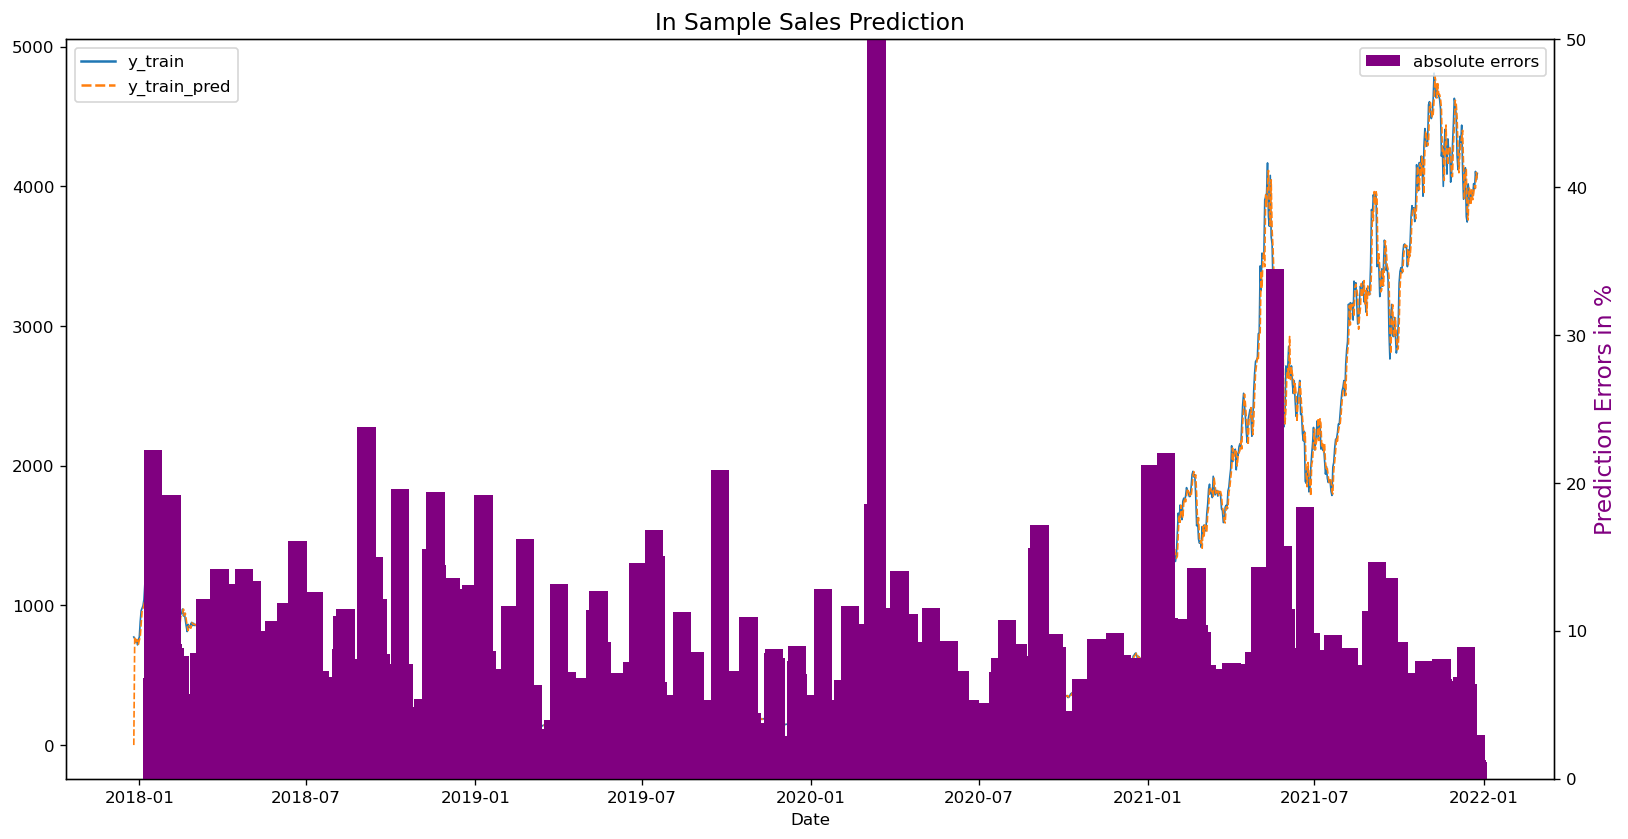

In [112]:
# Generate in-sample Predictions
# The parameter dynamic=False means that the model makes predictions upon the lagged values.
# This means that the model is trained until a point in the time-series and then tries to predict the next value.
pred = model_fit.predict_in_sample(dynamic=False) # works only with auto-arima
df_train['y_train_pred'] = pred

# Calculate the percentage difference
df_train['diff_percent'] = abs((df_train['y_train'] - pred) / df_train['y_train'])* 100

# Print the predicted time-series
fig, ax1 = plt.subplots(figsize=(16, 8))
plt.title("In Sample Sales Prediction", fontsize=14)
sns.lineplot(data=df_train[['y_train', 'y_train_pred']], linewidth=1.0)

# Print percentage prediction errors on a separate axis (ax2)
ax2 = ax1.twinx() 
ax2.set_ylabel('Prediction Errors in %', color='purple', fontsize=14)  
ax2.set_ylim([0, 50])
ax2.bar(height=df_train['diff_percent'][20:], x=df_train.index[20:], width=20, color='purple', label='absolute errors')
plt.legend()
plt.show()

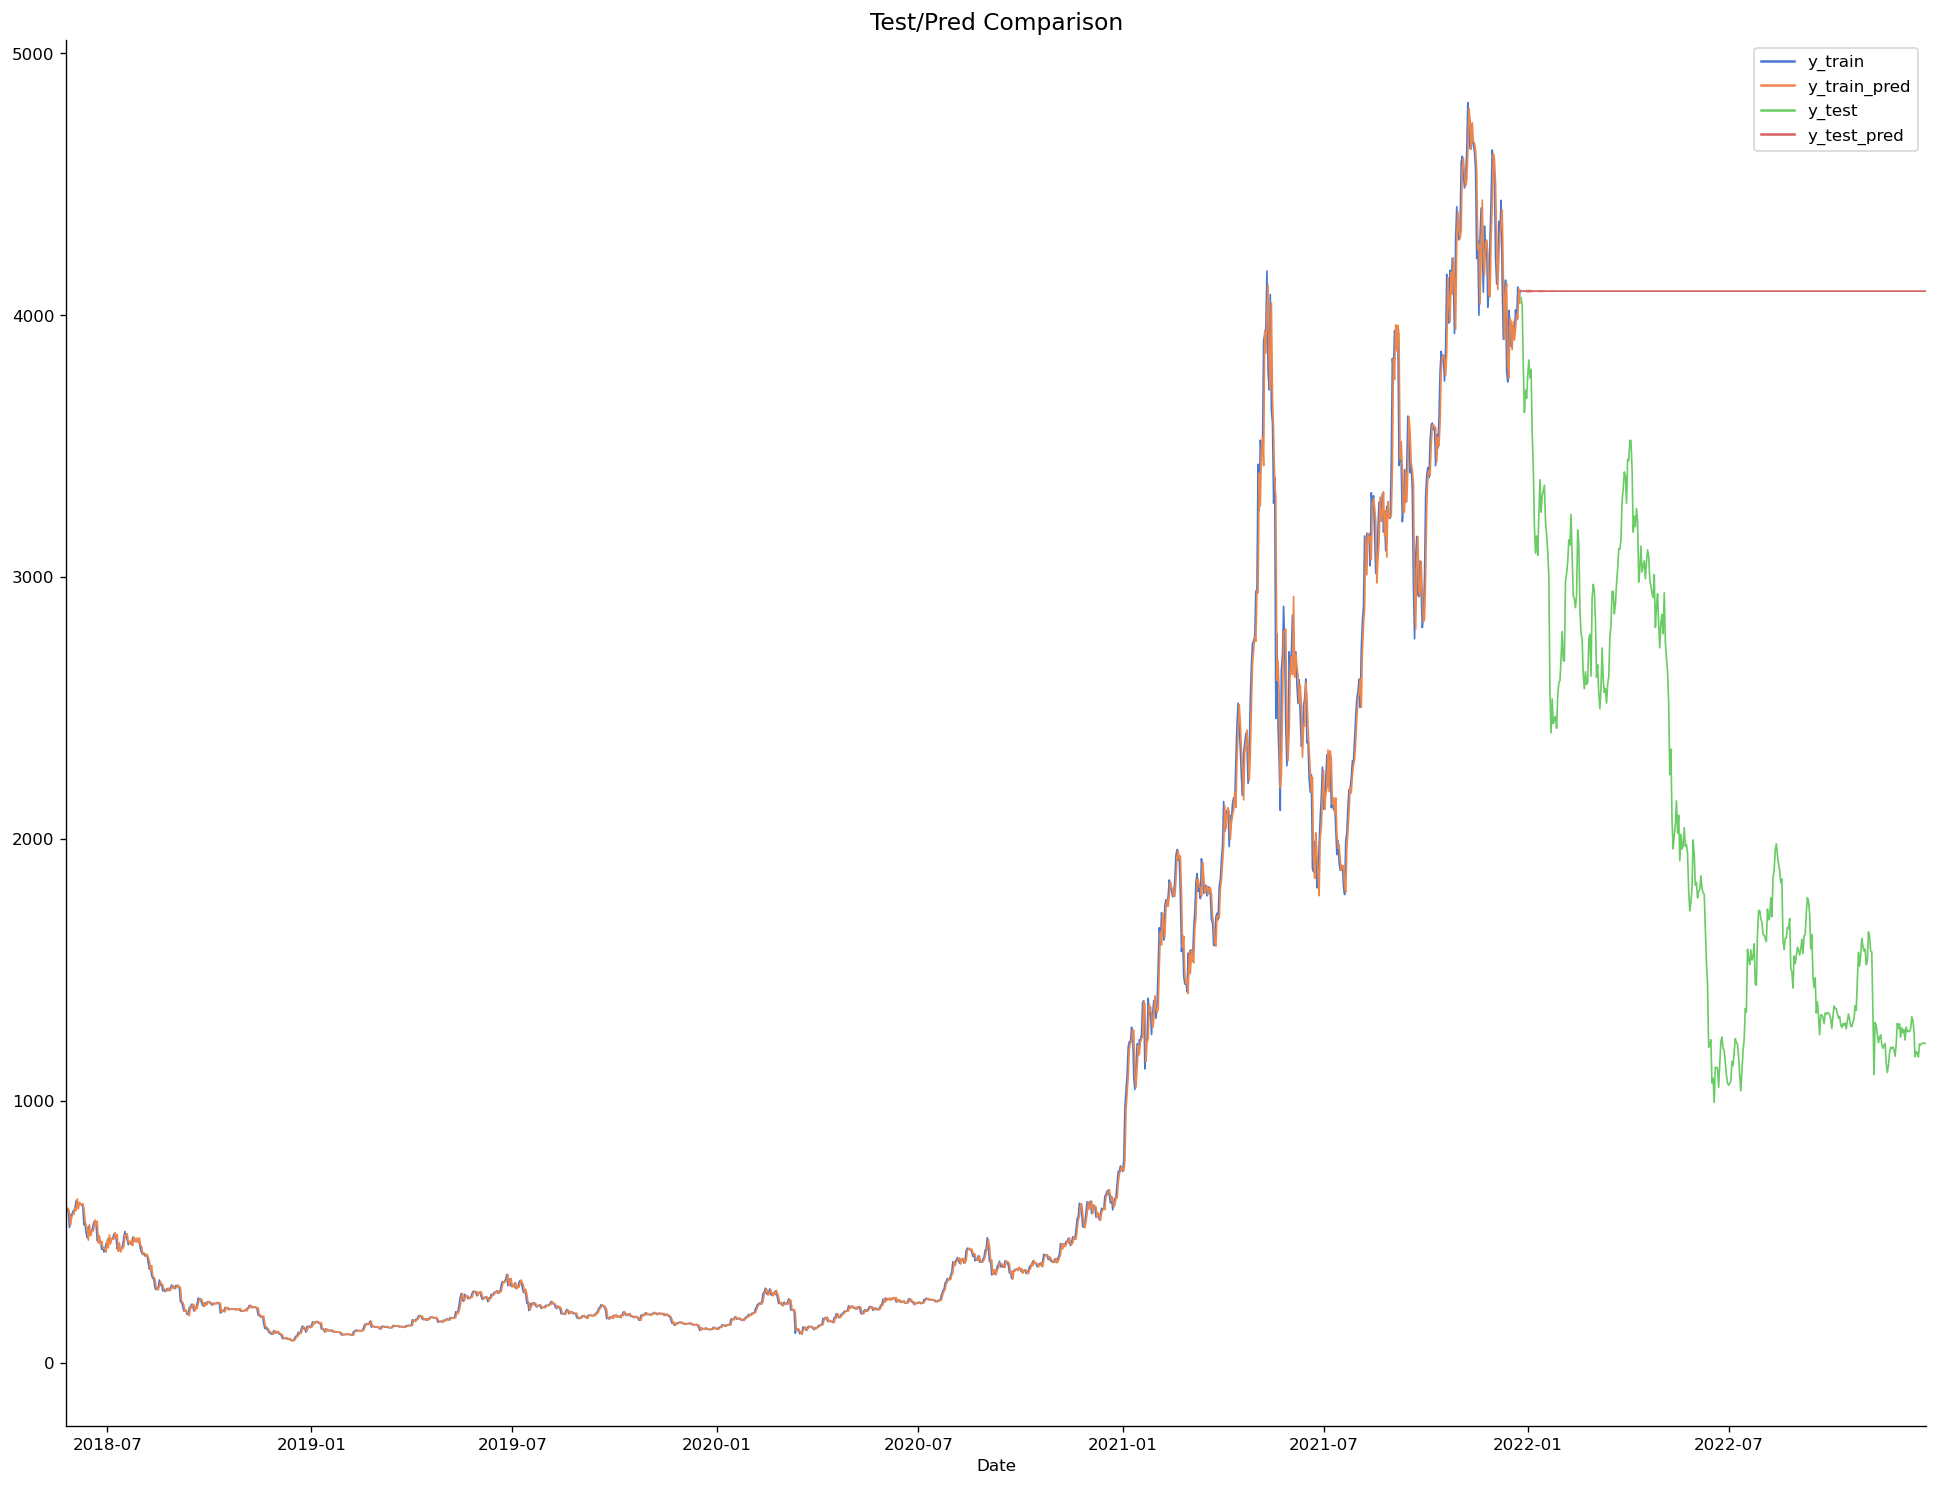

In [114]:
# Generate prediction for n periods, 
# Predictions start from the last date of the training data
test_pred = model_fit.predict(n_periods=366, dynamic=False)
df_test['y_test_pred'] = test_pred
df_union = pd.concat([df_train, df_test])
df_union.rename(columns={'Close':'y_test'}, inplace=True)

# Print the predicted time-series
fig, ax = plt.subplots(figsize=(20, 15))
plt.title("Test/Pred Comparison", fontsize=14)
sns.despine();
sns.lineplot(data=df_union[['y_train', 'y_train_pred', 'y_test', 'y_test_pred']], linewidth=1.0, dashes=False, palette='muted')
ax.set_xlim([df_union.index[150],df_union.index.max()])
plt.legend()

# Measure Performance

In [115]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [116]:
def mae(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))

In [117]:
mae(df_test['y_test'], df_test['y_test_pred'])



2064.1705770875355

In [118]:
def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape

In [121]:
mape(df_test['y_test'], df_test['y_test_pred'])


1.3375545379141982

In [122]:
RMSE = np.sqrt(mean_squared_error(df_test['y_test'], df_test['y_test_pred']))
RMSE

2214.4929666887124

In [123]:
pred_future = model.predict(start=end,end=end+30)
pred_future

array([1219.85418662, 1222.2319121 , 1220.08845258, 1218.48527355,
       1221.11286685, 1221.30939681, 1218.90586684, 1219.843841  ,
       1221.52577395, 1219.92279381, 1219.18335511, 1220.93600756,
       1220.77672379, 1219.30774074, 1220.12692334, 1221.04121712,
       1219.89760747, 1219.62148199, 1220.755666  , 1220.47446085,
       1219.60618024, 1220.25501807, 1220.71933648, 1219.93364272,
       1219.88813091, 1220.60069987, 1220.31139625, 1219.81794568,
       1220.3006588 , 1220.51185407, 1219.98937355])

In [124]:
import datetime
start_date = datetime.datetime(2022,12,26)
dates = [start_date + datetime.timedelta(days=idx) for idx in range(31)]

In [125]:
pred_future2 = pd.Series(pred_future, index = dates)
pred_future2

2022-12-26    1219.854187
2022-12-27    1222.231912
2022-12-28    1220.088453
2022-12-29    1218.485274
2022-12-30    1221.112867
2022-12-31    1221.309397
2023-01-01    1218.905867
2023-01-02    1219.843841
2023-01-03    1221.525774
2023-01-04    1219.922794
2023-01-05    1219.183355
2023-01-06    1220.936008
2023-01-07    1220.776724
2023-01-08    1219.307741
2023-01-09    1220.126923
2023-01-10    1221.041217
2023-01-11    1219.897607
2023-01-12    1219.621482
2023-01-13    1220.755666
2023-01-14    1220.474461
2023-01-15    1219.606180
2023-01-16    1220.255018
2023-01-17    1220.719336
2023-01-18    1219.933643
2023-01-19    1219.888131
2023-01-20    1220.600700
2023-01-21    1220.311396
2023-01-22    1219.817946
2023-01-23    1220.300659
2023-01-24    1220.511854
2023-01-25    1219.989374
dtype: float64

<AxesSubplot:xlabel='Date'>

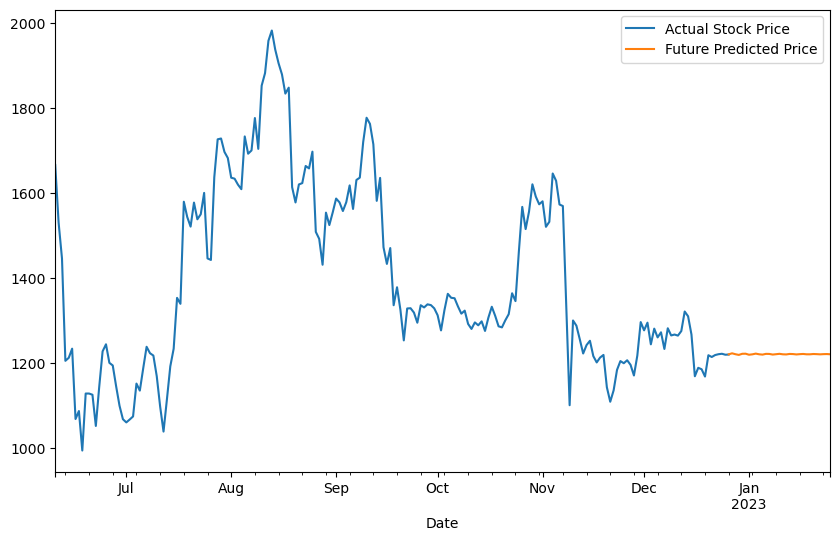

In [126]:
plt.figure(figsize=(10,6), dpi=100)
df2['Close'][-200:].plot(label='Actual Stock Price', legend=True)
pred_future2.plot(label='Future Predicted Price', legend=True)

In [37]:
pred_future = model.predict(start=end,end=end+30)
pred_future

array([16842.37649928, 16848.56874175, 16848.6024975 , 16848.6024975 ,
       16848.6024975 , 16848.6024975 , 16848.6024975 , 16848.6024975 ,
       16848.6024975 , 16848.6024975 , 16848.6024975 , 16848.6024975 ,
       16848.6024975 , 16848.6024975 , 16848.6024975 , 16848.6024975 ,
       16848.6024975 , 16848.6024975 , 16848.6024975 , 16848.6024975 ,
       16848.6024975 , 16848.6024975 , 16848.6024975 , 16848.6024975 ,
       16848.6024975 , 16848.6024975 , 16848.6024975 , 16848.6024975 ,
       16848.6024975 , 16848.6024975 , 16848.6024975 ])

In [41]:
import datetime
start_date = datetime.datetime(2022,12,5)
dates = [start_date + datetime.timedelta(days=idx) for idx in range(31)]

In [42]:
pred_future2 = pd.Series(pred_future, index = dates)
pred_future2

2022-12-05    9324.556885
2022-12-06    8938.998695
2022-12-07    8939.485121
2022-12-08    8966.045455
2022-12-09    8930.973255
2022-12-10    8950.611528
2022-12-11    8932.279401
2022-12-12    8935.715797
2022-12-13    8933.557344
2022-12-14    8934.039717
2022-12-15    8927.520054
2022-12-16    8927.033238
2022-12-17    8923.835377
2022-12-18    8922.241982
2022-12-19    8919.685640
2022-12-20    8917.508799
2022-12-21    8914.753374
2022-12-22    8912.640606
2022-12-23    8910.271719
2022-12-24    8907.983967
2022-12-25    8905.579949
2022-12-26    8903.250343
2022-12-27    8900.881067
2022-12-28    8898.566041
2022-12-29    8896.217724
2022-12-30    8893.873779
2022-12-31    8891.521709
2023-01-01    8889.181297
2023-01-02    8886.836657
2023-01-03    8884.494884
2023-01-04    8882.149297
dtype: float64

<AxesSubplot:xlabel='Date'>

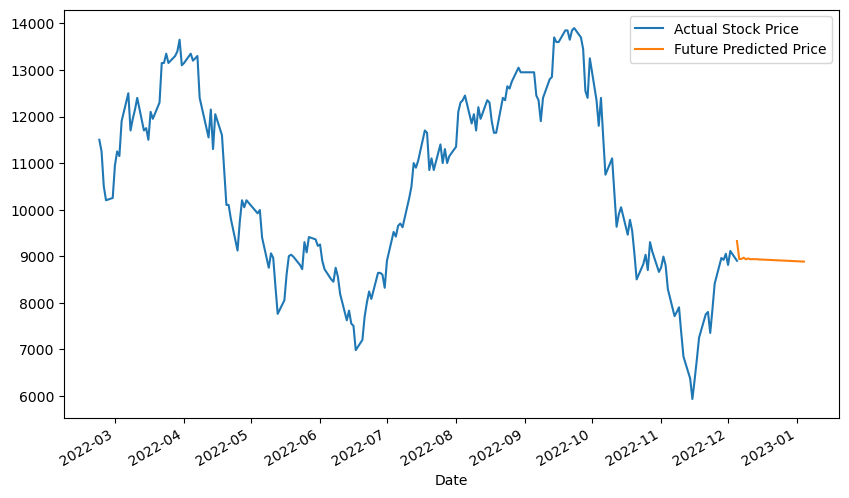

In [43]:
plt.figure(figsize=(10,6), dpi=100)
df2['Close'][-200:].plot(label='Actual Stock Price', legend=True)
pred_future2.plot(label='Future Predicted Price', legend=True)

In [44]:
pred_future = model.predict(start=end,end=end+60)
pred_future

array([9324.5568847 , 8938.99869519, 8939.48512105, 8966.04545473,
       8930.97325532, 8950.61152759, 8932.27940071, 8935.71579683,
       8933.5573441 , 8934.03971688, 8927.52005423, 8927.03323784,
       8923.83537746, 8922.24198206, 8919.68563957, 8917.50879939,
       8914.75337425, 8912.64060581, 8910.27171866, 8907.98396668,
       8905.57994863, 8903.25034306, 8900.88106702, 8898.56604057,
       8896.2177245 , 8893.87377922, 8891.52170866, 8889.18129741,
       8886.83665737, 8884.49488442, 8882.14929725, 8879.8048323 ,
       8877.46019607, 8875.11673721, 8872.77252228, 8870.42838431,
       8868.08398677, 8865.7398391 , 8863.39568131, 8861.05157793,
       8858.7073665 , 8856.36317427, 8854.01898245, 8851.67482054,
       8849.33064676, 8846.9864708 , 8844.64228623, 8842.29810797,
       8839.9539311 , 8837.60975551, 8835.26557725, 8832.92139892,
       8830.57722058, 8828.23304317, 8825.88886563, 8823.54468794,
       8821.20050997, 8818.85633214, 8816.51215439, 8814.16797

In [45]:
import datetime
start_date = datetime.datetime(2022,12,5)
dates = [start_date + datetime.timedelta(days=idx) for idx in range(61)]

In [46]:
pred_future2 = pd.Series(pred_future, index = dates)
pred_future2

2022-12-05    9324.556885
2022-12-06    8938.998695
2022-12-07    8939.485121
2022-12-08    8966.045455
2022-12-09    8930.973255
                 ...     
2023-01-30    8821.200510
2023-01-31    8818.856332
2023-02-01    8816.512154
2023-02-02    8814.167977
2023-02-03    8811.823799
Length: 61, dtype: float64

<AxesSubplot:xlabel='Date'>

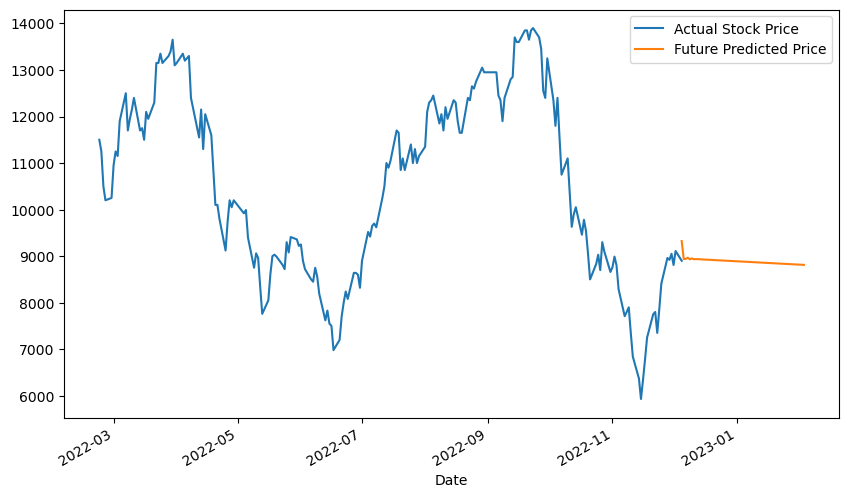

In [47]:
plt.figure(figsize=(10,6), dpi=100)
df2['Close'][-200:].plot(label='Actual Stock Price', legend=True)
pred_future2.plot(label='Future Predicted Price', legend=True)

In [48]:
pred_future = model.predict(start=end,end=end+120)
pred_future

array([9324.5568847 , 8938.99869519, 8939.48512105, 8966.04545473,
       8930.97325532, 8950.61152759, 8932.27940071, 8935.71579683,
       8933.5573441 , 8934.03971688, 8927.52005423, 8927.03323784,
       8923.83537746, 8922.24198206, 8919.68563957, 8917.50879939,
       8914.75337425, 8912.64060581, 8910.27171866, 8907.98396668,
       8905.57994863, 8903.25034306, 8900.88106702, 8898.56604057,
       8896.2177245 , 8893.87377922, 8891.52170866, 8889.18129741,
       8886.83665737, 8884.49488442, 8882.14929725, 8879.8048323 ,
       8877.46019607, 8875.11673721, 8872.77252228, 8870.42838431,
       8868.08398677, 8865.7398391 , 8863.39568131, 8861.05157793,
       8858.7073665 , 8856.36317427, 8854.01898245, 8851.67482054,
       8849.33064676, 8846.9864708 , 8844.64228623, 8842.29810797,
       8839.9539311 , 8837.60975551, 8835.26557725, 8832.92139892,
       8830.57722058, 8828.23304317, 8825.88886563, 8823.54468794,
       8821.20050997, 8818.85633214, 8816.51215439, 8814.16797

In [49]:
import datetime
start_date = datetime.datetime(2022,12,5)
dates = [start_date + datetime.timedelta(days=idx) for idx in range(121)]

In [50]:
pred_future2 = pd.Series(pred_future, index = dates)
pred_future2

2022-12-05    9324.556885
2022-12-06    8938.998695
2022-12-07    8939.485121
2022-12-08    8966.045455
2022-12-09    8930.973255
                 ...     
2023-03-31    8680.549843
2023-04-01    8678.205666
2023-04-02    8675.861488
2023-04-03    8673.517310
2023-04-04    8671.173132
Length: 121, dtype: float64

<AxesSubplot:xlabel='Date'>

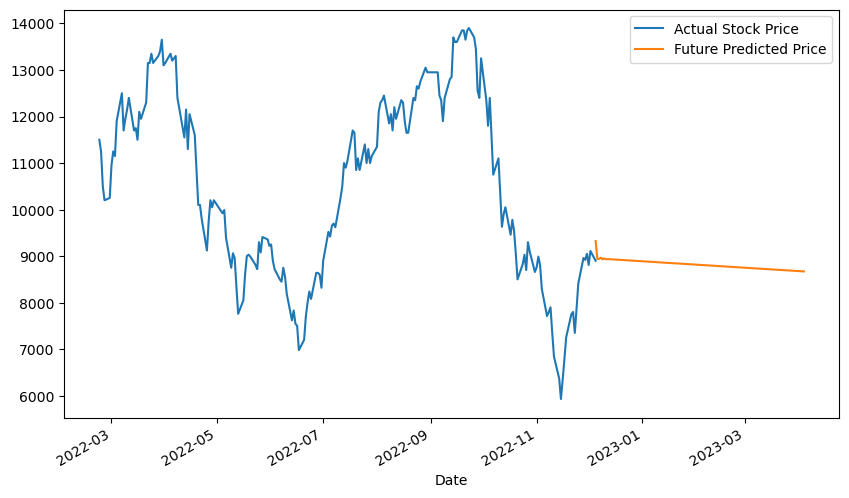

In [51]:
plt.figure(figsize=(10,6), dpi=100)
df2['Close'][-200:].plot(label='Actual Stock Price', legend=True)
pred_future2.plot(label='Future Predicted Price', legend=True)